# Evolution of Einstein's equations

# Initial data constants definition

In [10]:
# Gaussian parameters
s1,s2=1,1;
R01,R02,R03=4,4,10; 
P=0.3;
P3=0;
B=0;

In [11]:
ori=0.0;

# Initial data , setting length of the domain and discretization


In [12]:
m=4;
N=2.0^m*100.0;
Rf=40.0;
dx=Rf/N;
R1=range(ori, stop=Rf, step=dx);
dt=dx*0.4;
Nt=100.0*2^m;
Tf=Nt*dt; #final time
println("the final time is ", Tf)

the final time is 16.000000000000004


In [13]:
epsilon=0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)
omicron=0.0;#setting dissipation operator to O(R^2)
omega=120.0; #1/dx^4; #1/dx^2; #/dx^4;""

# Grid

In [14]:
R =range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx); #change in case you want to evolve a symmetric domain

L=length(R);
println("step size is  ", dx)

#T=range(dt,stop=Tf,step=dt)
T=range(0,stop=Tf-dt,step=dt)
println("the time step is ", dt)

step size is  0.025
the time step is 0.010000000000000002


In [15]:
include("./DoubleNullgauge_new.jl");

LoadError: SystemError: opening file "/home/rita13santos/Desktop/MSc Thesis/DoubleNullgauge_new.jl": No such file or directory

# Solving for the constraints of f and g

In [16]:
global_time = 0;

initf=zeros(L);
initg=zeros(L);

f0=0;
g0=3;
"""initf[3:L-2]=rungekutta4(TMconstraint_f, f0, R1);
initg[3:L-2]=rungekutta4(TMconstraint_g, g0, R1);"""

initf[3:L-2]=rk4wrapper(TMconstraint_f,f0,R1,0)
initg[3:L-2]=rungekutta4(TMconstraint_g,g0,R1)

#ghost points
initf[2]=extrapolate_in(initf[3],initf[4])
initf[1]=extrapolate_in(initf[2],initf[3])

initg[2]=extrapolate_in(initg[3],initg[4])
initg[1]=extrapolate_in(initg[2],initg[3])

2.9500052081637946

# Defining the initial state array for the evolution

In [17]:
state_array=[initf initg];
state_array=ghost(state_array);

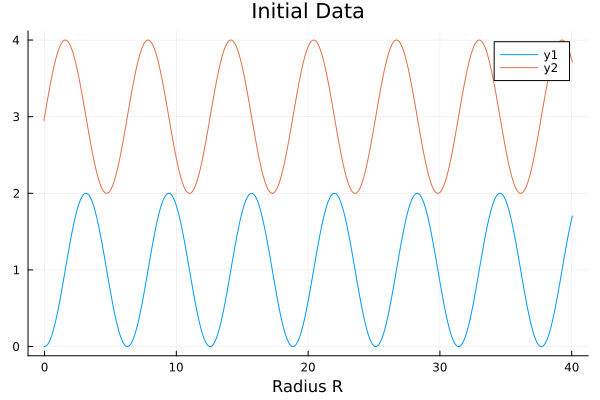

In [18]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, state_array, xaxis="Radius R",title="Initial Data")

 ## Evolution

In [19]:
using ProgressMeter
@showprogress for k in 1:length(T)
    global_time = T[k]
    state_array=rungekutta4molstep(TMRHS,state_array,T,k,0) 
    #state_array=ghost(state_array)
            #if mod(k,30)==1
    using CSV, Tables
    CSV.write("/home/rita13santos/Desktop/MSc Thesis/DATA/DNGauge/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:45


## Movie of the evolution

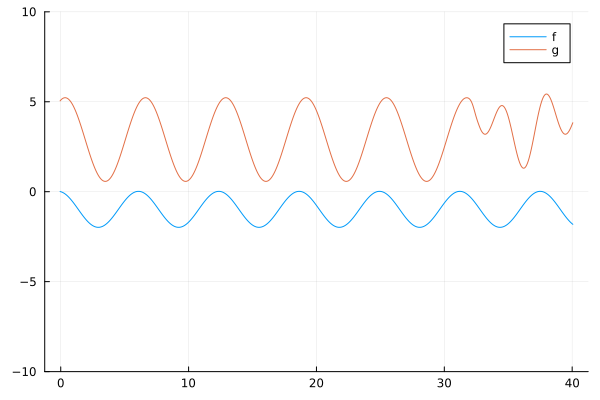

In [44]:
#making a movie of the evolution
global dir="/home/rita13santos/Desktop/MSc Thesis/DATA/DNGauge/"
using Plots, CSV, DataFrames
import GR
for n in 1:10:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    functions3=DataFrame(CSV.File(joinpath(dir,"time_step$n.csv"),header=false, delim=","))
    plot()
        plot1=functions3.Column1[1:L];
        plot2=functions3.Column2[1:L];
    d=round(T[n],digits=1)
    plot!(R, [plot1 plot2], labels=["f" "g"],ylims=(-10,10)) |> display 
    
    end